In [11]:
import sqlite3
import pandas as pd
%matplotlib inline
def read_sql(db, sql):
    c = sqlite3.connect(db)
    df = pd.read_sql(sql, c)
    c.close()
    return df

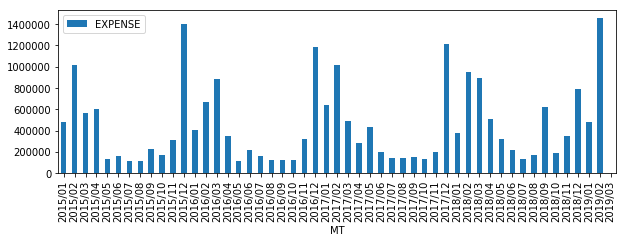

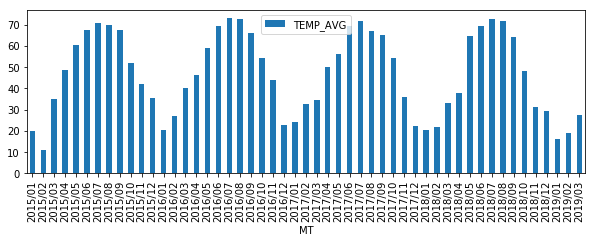

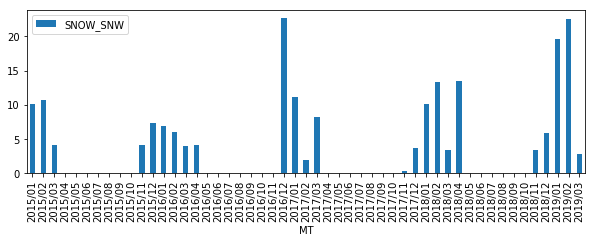

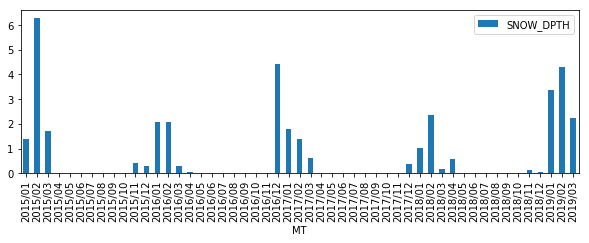

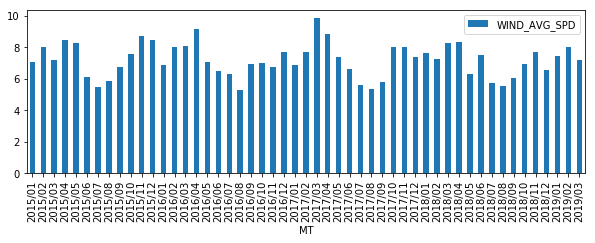

In [45]:
sql = '''
select MT, sum("AMOUNT") as EXPENSE from cost
group by MT 
order by MT 
'''
total = read_sql('cost.db', sql)

sql = '''
select MT, avg("TEMP AVG") as "TEMP_AVG", sum("SNOW SNW") as "SNOW_SNW", 
avg("SNOW DPTH") as "SNOW_DPTH", avg("WIND AVG SPD") as "WIND_AVG_SPD" 
from weather
group by MT 
order by MT 
'''
weather = read_sql('weather.db', sql)
weather['CONST'] = 1

total.plot.bar(x = 'MT', figsize = (10, 3))

weather[['MT', 'TEMP_AVG']].plot.bar(x = 'MT', figsize = (10, 3))
weather[['MT', 'SNOW_SNW']].plot.bar(x = 'MT', figsize = (10, 3))
weather[['MT', 'SNOW_DPTH']].plot.bar(x = 'MT', figsize = (10, 3))
weather[['MT', 'WIND_AVG_SPD']].plot.bar(x = 'MT', figsize = (10, 3))

weather['COST'] = total.EXPENSE

In [46]:
weather

,MT,TEMP_AVG,SNOW_SNW,SNOW_DPTH,WIND_AVG_SPD,CONST,COST
0,2015/01,20.096774,10.2,1.387097,7.077419,1,478856.70
1,2015/02,11.178571,10.7,6.285714,8.007143,1,1013344.93
2,2015/03,34.838710,4.2,1.709677,7.196774,1,563367.33
3,2015/04,48.533333,0.0,0.000000,8.466667,1,607092.10
4,2015/05,60.483871,0.0,0.000000,8.283871,1,137855.22
5,2015/06,67.466667,0.0,0.000000,6.123333,1,161803.03
6,2015/07,70.935484,0.0,0.000000,5.512903,1,110880.96
7,2015/08,69.903226,0.0,0.000000,5.858065,1,116129.93
8,2015/09,67.333333,0.0,0.000000,6.746667,1,223710.13
9,2015/10,51.806452,0.0,0.000000,7.561290,1,176129.13


[-4.08898481e-01  3.47280244e-01  1.23268121e-04 -3.66955211e-17]


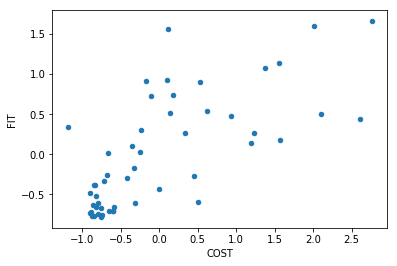

In [49]:
import numpy as np

explanatory = ['TEMP_AVG', 'SNOW_SNW', 'SNOW_DPTH', 'CONST']
weather["COST"] = (weather["COST"] - weather["COST"].mean()) / weather["COST"].std()
for idx in range(len(explanatory) - 1):
    s = weather[explanatory[idx]]
    weather[explanatory[idx]] = (s - s.mean()) / s.std()
res = np.linalg.lstsq(weather[explanatory], weather["COST"], rcond=None)

c = res[0]
print(c)

weather['FIT'] = 0
for idx in range(len(explanatory)):
    weather['FIT'] += weather[explanatory[idx]] * c[idx]

weather.plot.scatter(x='COST', y='FIT')


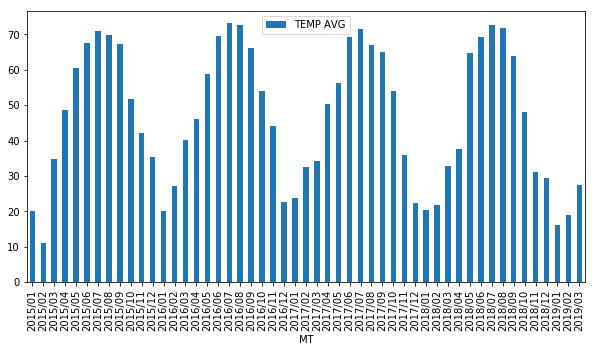

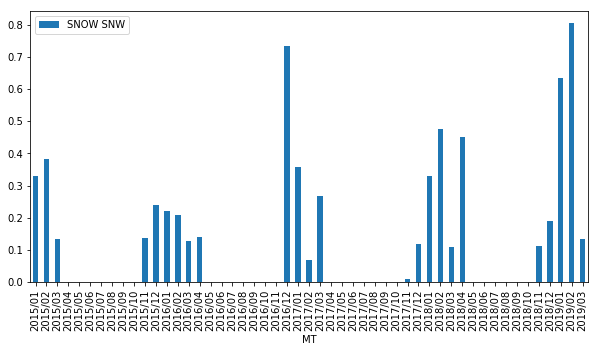

In [18]:
sql = '''
select MT,  from weather
group by MT 
order by MT 
'''
snow = read_sql('weather.db', sql)
snow.plot.bar(x = 'MT', figsize = (10, 5))

In [ ]:
sql = '''
select MT, avg("SNOW SNW") as "SNOW SNW" from weather
group by MT 
order by MT 
'''
snow = read_sql('weather.db', sql)
snow.plot.bar(x = 'MT', figsize = (10, 5))